In [32]:
import sys
sys.path.insert(0, "../")
import rebound
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from src.utilities.constants import sec2year, rad2Deg, m2au, au2m
from src.utilities.misc import normDif

In [33]:
def invariable_inc(sim, p):
    from numpy import cross, dot, arccos
    from numpy.linalg import norm
    sim_ang_mom = sim.calculate_angular_momentum()
    p_ang_mom = cross(p.xyz, p.vxyz)

    inc = arccos(dot(sim_ang_mom, p_ang_mom)/(norm(sim_ang_mom)*norm(p_ang_mom)))
    return inc*rad2Deg

In [34]:
sa = rebound.SimulationArchive("/Users/bethclark/Projects/rebound/examples/Flora_300Myr/Flora_300Myr_C.bin")
len(sa)

53

In [35]:
sim_init = sa[0]
sim_final = sa[-1]

/Users/bethclark/Projects/Flora_Family/venv/lib/python3.9/site-packages/rebound/simulationarchive.py:146: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


(<Figure size 720x720 with 1 Axes>, <AxesSubplot:xlabel='x', ylabel='y'>)

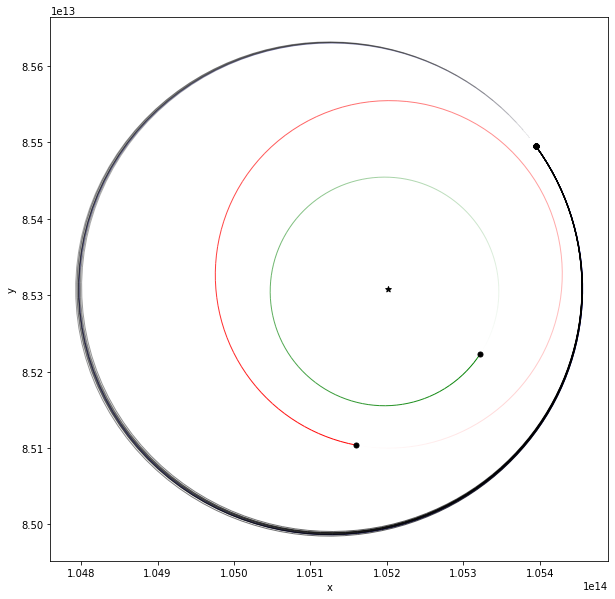

In [58]:
rebound.OrbitPlot(sim_init, plotparticles=[3,4,"Flora"]+list(range(10,20)), color=['green', 'red', 'blue'] + ['black' for i in range(1,20)], figsize = (10, 10))

(<Figure size 720x720 with 1 Axes>, <AxesSubplot:xlabel='x', ylabel='y'>)

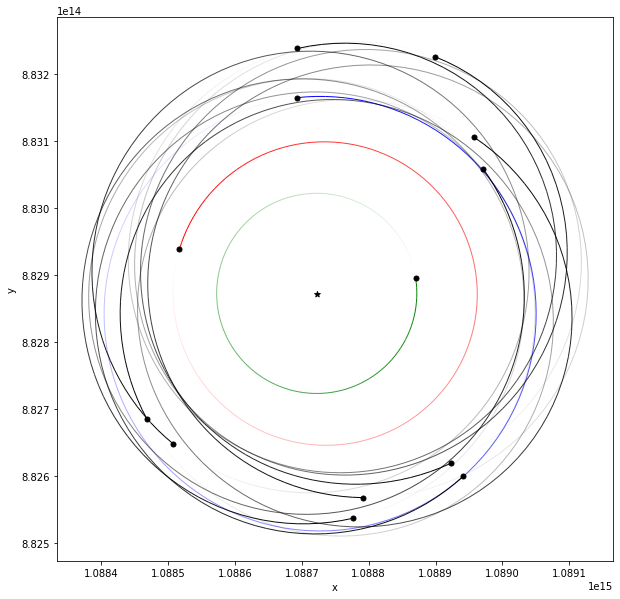

In [59]:
rebound.OrbitPlot(sim_final, plotparticles=[3,4,"Flora"]+list(range(10,20)), color=['green', 'red', 'blue'] + ['black' for i in range(1,20)], figsize = (10, 10))

In [45]:
data = {'time':[], 'eccs': [], 'incs':[], 'a': []}
for sim in sa:
    ps = sim.particles
    data['time'].append(sim.t/sec2year)
    data['a'].append([p.a for p in ps[10:]])
    data['eccs'].append([p.e for p in ps[10:]])
    data['incs'].append([p.inc for p in ps[10:]])

/Users/bethclark/Projects/Flora_Family/venv/lib/python3.9/site-packages/rebound/simulationarchive.py:146: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


0.2232586207386515


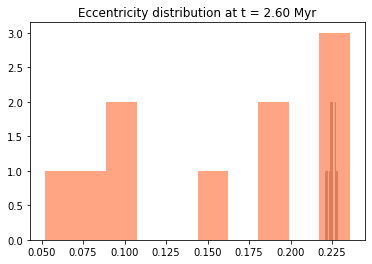

In [43]:
plt.hist(data['eccs'][0], color = 'grey')
plt.hist(data['eccs'][-1], color = 'coral', alpha = .7)
plt.title('Eccentricity distribution at t = {:.2f} Myr'.format(data['time'][-1]*1e-6))
print(sim_init.particles["Flora"].e)

0.05288270293740137


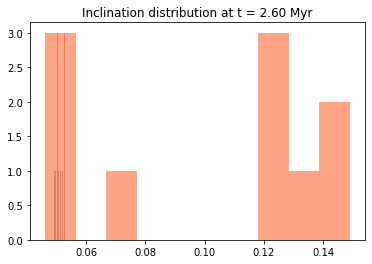

In [44]:
plt.hist(data['incs'][0], color = 'grey')
plt.hist(data['incs'][-1], color = 'coral', alpha = .7)
plt.title('Inclination distribution at t = {:.2f} Myr'.format(data['time'][-1]*1e-6))
print(sim_init.particles["Flora"].inc)

0.05288270293740137


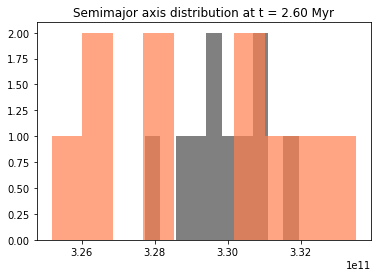

In [53]:
plt.hist(data['a'][0], color = 'grey')
plt.hist(data['a'][-1], color = 'coral', alpha = .7)
plt.title('Semimajor axis distribution at t = {:.2f} Myr'.format(data['time'][-1]*1e-6))
print(sim_init.particles["Flora"].inc)

Text(0, 0.5, 'Eccentricty')

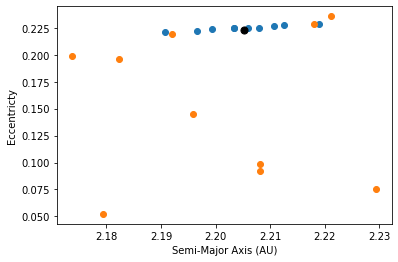

In [50]:
plt.scatter([a*m2au for a in data['a'][0]], data['eccs'][0])
Flora = sim_init.particles['Flora']
plt.scatter(Flora.a*m2au, Flora.e, s=50, c='k')
plt.scatter([a*m2au for a in data['a'][-1]], data['eccs'][-1])
plt.xlabel('Semi-Major Axis (AU)')
plt.ylabel('Eccentricty')

Text(0, 0.5, 'Inclination')

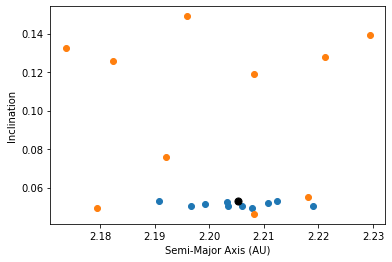

In [52]:
plt.scatter([a*m2au for a in data['a'][0]], data['incs'][0])
Flora = sim_init.particles['Flora']
plt.scatter(Flora.a*m2au, Flora.inc, s=50, c='k')
plt.scatter([a*m2au for a in data['a'][-1]], data['incs'][-1])
plt.xlabel('Semi-Major Axis (AU)')
plt.ylabel('Inclination')